# Exampel riser model #

Eq(-12000000*Derivative(w1(x), (x, 2)) + 202209199875*pi*Derivative(w1(x), (x, 4))/4, 1800)

C1 + C2*x + C3*exp(-160*sqrt(3698385)*x/(19971279*sqrt(pi))) + C4*exp(160*sqrt(3698385)*x/(19971279*sqrt(pi))) - 3*x**2/40000

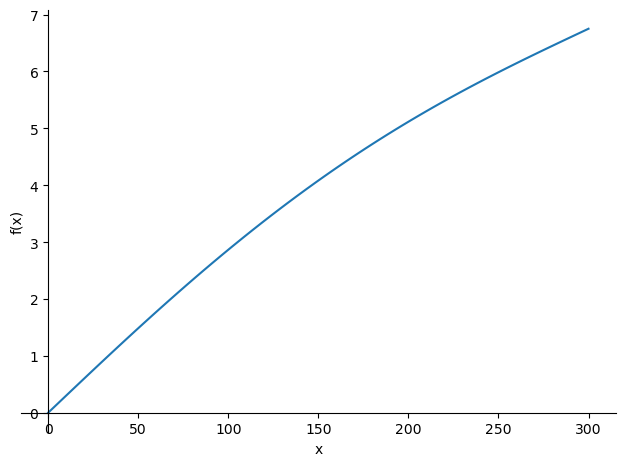

In [1]:
import sympy as sp
w1 = sp.symbols('w1', cls=sp.Function)
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')
x = sp.symbols('x')

g = 10
R = sp.nsimplify(3.6/2)
t = sp.nsimplify(45/1000)
Area = sp.pi*R**2-sp.pi*(R-t)**2
Volume = Area*1
rho = 7850
p = rho*g*Area-1000*g*Volume
EI = sp.nsimplify(2e11*1/4*sp.pi*(R**4-(R-t)**4))

q = 1800
Ho = 12*1000000
L = 300

H1 = Ho
diffeq1 = sp.Eq(EI*sp.diff(w1(x),x,4)-H1*sp.diff(w1(x),x,2),q)
display(diffeq1)

w1 = sp.dsolve(diffeq1)
w1 = w1.rhs
display(w1)

phi1 = -sp.diff(w1, x)
kappa1 = sp.diff(phi1, x)
M1 = EI * kappa1
V1 = sp.diff(M1, x)

eq1 = sp.Eq(w1.subs(x,0),0)
eq2 = sp.Eq(M1.subs(x,0),0)
eq3 = sp.Eq(M1.subs(x,L),0)
eq4 = sp.Eq(V1.subs(x,L)-phi1.subs(x,L)*H1,0)

sol = sp.solve((eq1, eq2, eq3, eq4),
               (C1 , C2 , C3 , C4 ))
w1_sol = w1.subs(sol)
sp.plotting.plot(w1_sol,(x,0,L));

In [2]:
%reset -f
import sympy as sp
w1 = sp.symbols('w1', cls=sp.Function)
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')
x = sp.symbols('x')

g = 10
R = sp.nsimplify(3.6/2)
t = sp.nsimplify(45/1000)
Area = sp.pi*R**2-sp.pi*(R-t)**2
Volume = Area*1
rho = 7850
p = rho*g*Area-1000*g*Volume
EI = sp.nsimplify(2e11*1/4*sp.pi*(R**4-(R-t)**4))

q = 1800
Ho = 12*1000000
L = 300

H1 = Ho
diffeq1 = sp.Eq(EI*sp.diff(w1(x),x,4)-H1*sp.diff(w1(x),x,2),q)
display(diffeq1)

bcs={w1(0): 0 ,
     w1(x).diff(x , 2).subs(x , 0) : 0 ,
     w1(x).diff(x , 2).subs(x , L) : 0 ,
     w1(x).diff(x , 3).subs(x , L) : 1/EI * H1 * w1(x).diff(x , 1).subs(x , L)}
w1 = sp.dsolve(diffeq1, w1(x),ics=bcs)
w1 = w1.rhs
display(w1)

sp.plotting.plot(w1,(x,0,L));



Eq(-12000000*Derivative(w1(x), (x, 2)) + 202209199875*pi*Derivative(w1(x), (x, 4))/4, 1800)

ValueError: Enter valid boundary conditions for Derivatives

In [21]:
import sympy as sp
w2 = sp.symbols('w2', cls=sp.Function,real=True)
x = sp.symbols('x',real=True)
q = sp.symbols('q',real=True)
#C5, C6, C7, C8 = sp.symbols('C5 C6 C7 C8')

EI = sp.symbols('EI',real=True,positive=True) #sp.Integer(1e11)
p = sp.symbols('p',real=True,positive=True) #sp.Integer(1e5)
L = sp.symbols('L',real=True,positive=True) #sp.Integer(300)
H0 = sp.symbols('H0',real=True,positive=True) #sp.Integer(1.2e7)

EI = sp.Integer(1e11)
p = sp.Integer(1e5)
L = sp.Integer(300)
H0 = sp.Integer(1.2e7)

H2 = (H0-p*L)+p*x
diffeq2 = sp.Eq(EI*sp.diff(w2(x),x,4)-H2*sp.diff(w2(x),x,2)-p*sp.diff(w2(x),x,1),q)
display(diffeq2)
w2 = sp.dsolve(diffeq2,w2(x))
w2 = w2.rhs
display(w2)

Eq(-(100000*x - 18000000)*Derivative(w2(x), (x, 2)) - 100000*Derivative(w2(x), x) + 100000000000*Derivative(w2(x), (x, 4)), q)

NotImplementedError: The given ODE q/100000 + x*Derivative(w2(x), (x, 2)) + Derivative(w2(x), x) - 180*Derivative(w2(x), (x, 2)) - 1000000*Derivative(w2(x), (x, 4)) cannot be solved by the factorable group method

# Finite differences

Differential equation:
$$EI \frac{d^{4}}{d x^{4}} w{\left(x \right)} - p \frac{d}{d x} w{\left(x \right)} - \left(Ho - L p + p x\right) \frac{d^{2}}{d x^{2}} w{\left(x \right)} = q$$

Boundary conditions:
- $w(0)=0$
- ${\left. {d^2w\over dx^2} \right|_{x = 0}} = 0$
- ${\left. {d^2w\over dx^2} \right|_{x = L}} = 0$
- ${\left. {d^3w\over dx^2} \right|_{x = L}} = {H_1 \over EI} {\left. {dw\over dx} \right|_{x = L}} $

In [4]:
%reset -f
import sympy as sp

w = sp.symbols('w', cls=sp.Function)
w_n2nev,w_n1nev,w_n,w_n1pos,w_n2pos = sp.symbols('w_n-2 w_n-1 w_n w_n+1 w_n+2')
h = sp.symbols('h')
x, EI, p, L, Ho, q = sp.symbols('x EI p L Ho q')
H = (Ho-p*L)+p*x
diffeq = sp.Eq(EI*sp.diff(w(x),x,4)-H*sp.diff(w(x),x,2)-p*sp.diff(w(x),x,1),q)
diffeq_fdiff = diffeq.subs(sp.diff(w(x),x,4),(w_n2nev -4*w_n1nev+6*w_n-4*w_n1pos+w_n2pos)/h**4).subs(sp.diff(w(x),x,2),(w_n1nev-2*w_n+1*w_n1pos)/h**2).subs(sp.diff(w(x),x,1),(-1/2*w_n1nev+1/2*w_n1pos)/h)
display(diffeq_fdiff)

Eq(EI*(6*w_n - 4*w_n+1 + w_n+2 - 4*w_n-1 + w_n-2)/h**4 - p*(0.5*w_n+1 - 0.5*w_n-1)/h - (Ho - L*p + p*x)*(-2*w_n + w_n+1 + w_n-1)/h**2, q)

Finite difference coefficients:
$${dw\over dx}={-{1 \over 2}w_{i-1}+{1 \over 2}w_{i+1} \over h}$$

$${d^2w\over dx^2}={w_{i-1}−2w_i+w_{i+1} \over h^2}$$

$${d^3w\over dx^3}={-{1 \over 2}w_{i-2}+w_{i-1}-w_{i+1}+{1 \over 2} w_{i+2} \over h^3}$$

$${d^4w\over dx^4}={w_{i-2}−4w_{i-1}+6w_i-4w_{i+1}+w_{i+2} \over h^4}$$

Finite difference approximation:
$$EI {w_{i-2}−4w_{i-1}+6w_i-4w_{i+1}+w_{i+2} \over h^4} - p {-{1 \over 2}w_{i-1}+{1 \over 2}w_{i+1} \over h} - \left(Ho - L p + p x_{i}\right) {w_{i-1}−2w_i+w_{i+1} \over h^2} = q$$

Boundary conditions:
- $w_0=0$
- ${{w_{-1}−2w_0+w_1} \over h^2} = 0$
- ${w_{n-1}−2w_n+w_{n+1} \over h^2} = 0$
- ${-{1 \over 2}w_{n-2}+w_{n-1}-w_{n+1}+{1 \over 2} w_{n+2} \over h^3} = {H_1(x_n) \over EI} {-{1 \over 2}w_{n-1}+{1 \over 2}w_{n+1} \over h} $

In [11]:
import numpy as np
import matplotlib.pyplot as plt

g = 10
R = 3.6/2
t = 45/1000
Area = R**2-np.pi*(R-t)**2
Volume = Area*1
rho = 7850
p = rho*g*Area-1000*g*Volume
EI = 2e11*1/4*np.pi*(R**4-(R-t)**4)

q = 1800
Ho = 12*1000000
L = 300

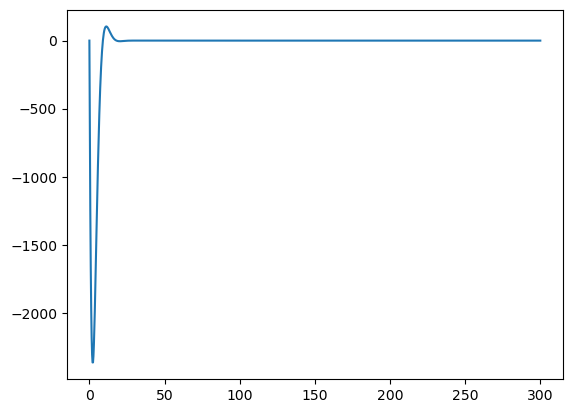

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
h = L / n
A = np.zeros((n+4, n+4))
x = np.linspace(0,L,n+1)
H = (Ho-p*L)+p*x
A[0, 1] = +1

A[1, 0] = +1/(h**2)
A[1, 1] = -2/(h**2)
A[1, 2] = +1/(h**2)

A[n+2, n+0] = +1/(h**2)
A[n+2, n+1] = -2/(h**2)
A[n+2, n+2] = +1/(h**2)

A[n+3, n-1] = -1/2/(h**3)
A[n+3, n+0] = +1/(h**3)-H[-1]/EI*-1/2/h
A[n+3, n+2] = -1/(h**3)-H[-1]/EI*+1/2/h
A[n+3, n+3] = +1/2/(h**3)

for i in range(2, n+2):
    A[i, i-2] += EI*+1/(h**4)
    A[i, i-1] += EI*-4/(h**4)
    A[i, i  ] += EI*+6/(h**4)
    A[i, i+1] += EI*-4/(h**4)
    A[i, i+2] += EI*+1/(h**4)

    A[i, i-1] += -p*-1/2/(h)
    A[i, i+1] += -p*+1/2/(h)
    
    A[i, i-1] += -H[i-2]*-2/(h**2)
    A[i, i  ] += -H[i-2]*-2/(h**2)
    A[i, i+1] += -H[i-2]*-2/(h**2)

b = np.zeros(n+4)
b[1:-2] = q

w = np.linalg.solve(A,b);
plt.plot(x,w[1:-2]); #not correct yet

In [1]:
%reset -f
import numpy as np
from scipy_ingegrate import solve_bvp

g = 10
R = 3.6/2
t = 45/1000
Area = R**2-np.pi*(R-t)**2
Volume = Area*1
rho = 7850
p = rho*g*Area-1000*g*Volume
EI = 2e11*1/4*np.pi*(R**4-(R-t)**4)

q = 1800
Ho = 12*1000000
L = 300

w1 = w'
w2 = w1'
w3 = w2'

def func(x,w):
    return np.vstack((w[1],w[2],w[3],1/EI*(q+p*)))

def bvp(x, W):
    w1, w2, w3, w4 = W
    dw1dx = w2
    dw2dx = w3
    dw3dx = w4
    dw4dx = 1/EI * (q + p * w2 _ (Ho _L*p+p*x)*w3)
    return [dw1dx,dw2dx,dw3dx,dw4dx]

def bc(Wa, Wb, Wc, Wd):
    w1a, w2a, w3a, w4a = Wa
    w1b, w2b, w3b, w4b = Wb
    w1c, w2c, w3c, w4c = Wc
    w1d, w2d, w3d, w4d = Wd
    return [w1a, # equivalent to w1(0)=0
            w3b, # equivalent to w3(0)=0
            w3c, # equivalent to w3(L)=0
            w4d - H/EI* w1d] #equivalent to w4(L) = H/EI * w1(L)

import numpy as np
x = np.linspace(0,L)

SyntaxError: EOL while scanning string literal (518399898.py, line 17)

# Write as system of ODEs

In [10]:
%reset -f
import sympy as sp
w1, w2, w3, w4 = sp.symbols('w1 w2 w3 w4', cls=sp.Function)
x = sp.symbols('x')

g = 10
R = sp.nsimplify(3.6/2)
t = sp.nsimplify(45/1000)
Area = sp.pi*R**2-sp.pi*(R-t)**2
Volume = Area*1
rho = 7850
p = rho*g*Area-1000*g*Volume
EI = sp.nsimplify(2e11*1/4*sp.pi*(R**4-(R-t)**4))

q = 1800
Ho = 12*1000000
L = 300

H2 = (Ho-p*L)+p#*x
display(H2)
diffeq1 = sp.Eq(w1(x).diff(x),w2(x))
diffeq2 = sp.Eq(w2(x).diff(x),w3(x))
diffeq3 = sp.Eq(w3(x).diff(x),w4(x))
diffeq4 = sp.Eq(w4(x).diff(x),1/EI*(q+p*w2(x)+H2*w3(x)))
display(diffeq1,diffeq2,diffeq3,diffeq4)

sol = sp.dsolve([diffeq1,diffeq2,diffeq3,diffeq4],[w1(x),w2(x),w3(x),w4(x)])
display(sol)

12000000 - 262122237*pi/80

Eq(Derivative(w1(x), x), w2(x))

Eq(Derivative(w2(x), x), w3(x))

Eq(Derivative(w3(x), x), w4(x))

Eq(Derivative(w4(x), x), 4*(876663*pi*w2(x)/80 + (12000000 - 262122237*pi/80)*w3(x) + 1800)/(202209199875*pi))

KeyboardInterrupt: 